In [ ]:
# Load the data first 
# import pandas as pd 
df = pd.read_csv("../cleaned_dataset/labelled_ble_data.csv")

In [2]:
df.head()

,timestamp,mac address,RSSI,room
0,2023-04-10 14:21:46+09:00,6,-93,kitchen
1,2023-04-10 14:21:46+09:00,6,-93,kitchen
2,2023-04-10 14:21:46+09:00,6,-93,kitchen
3,2023-04-10 14:21:46+09:00,6,-93,kitchen
4,2023-04-10 14:21:46+09:00,6,-93,kitchen


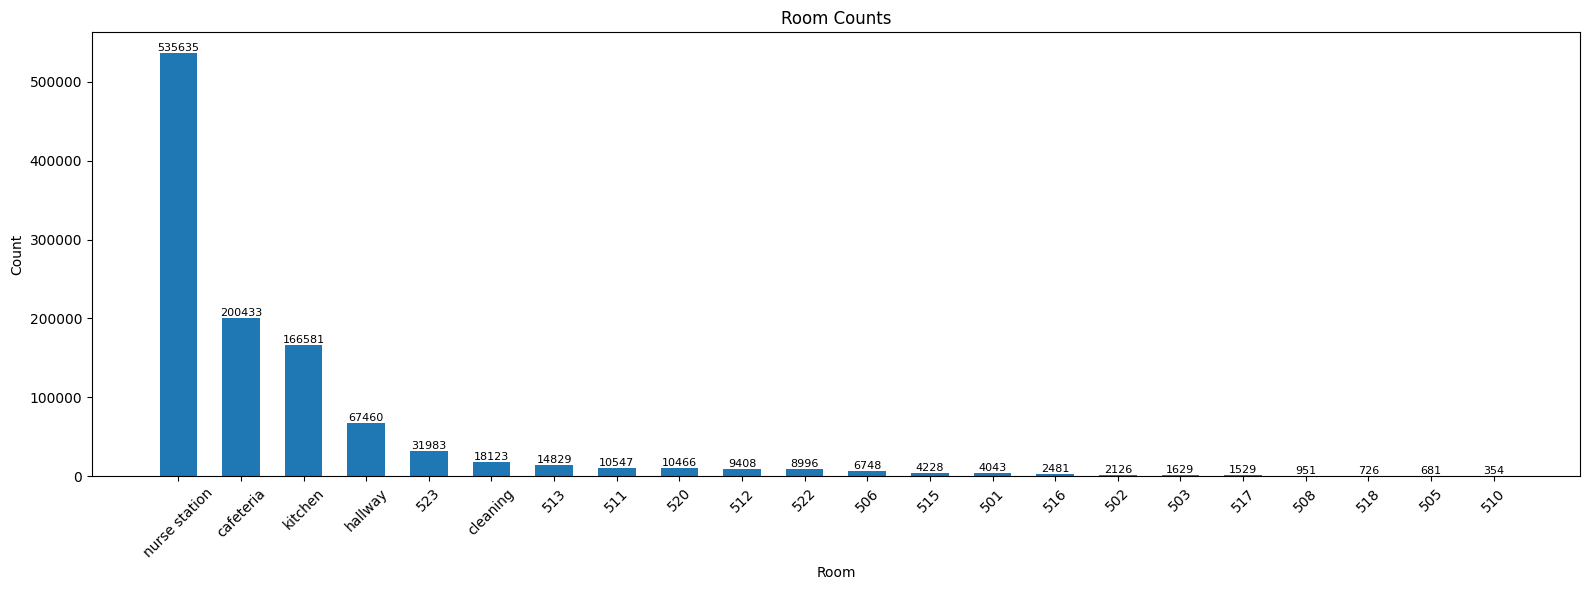

In [5]:
# now we would want to see the distribution of data, checking whether 
# any class imbalance or not

import matplotlib.pyplot as plt

# Get value counts
room_counts = df["room"].value_counts()

# Create bar chart with wider figure
plt.figure(figsize=(16, 6))
bars = plt.bar(room_counts.index, room_counts.values, width=0.6)

# Add count labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=8)

plt.title('Room Counts')
plt.xlabel('Room')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
room_counts

room
nurse station    535635
cafeteria        200433
kitchen          166581
hallway           67460
523               31983
cleaning          18123
513               14829
511               10547
520               10466
512                9408
522                8996
506                6748
515                4228
501                4043
516                2481
502                2126
503                1629
517                1529
508                 951
518                 726
505                 681
510                 354
Name: count, dtype: int64

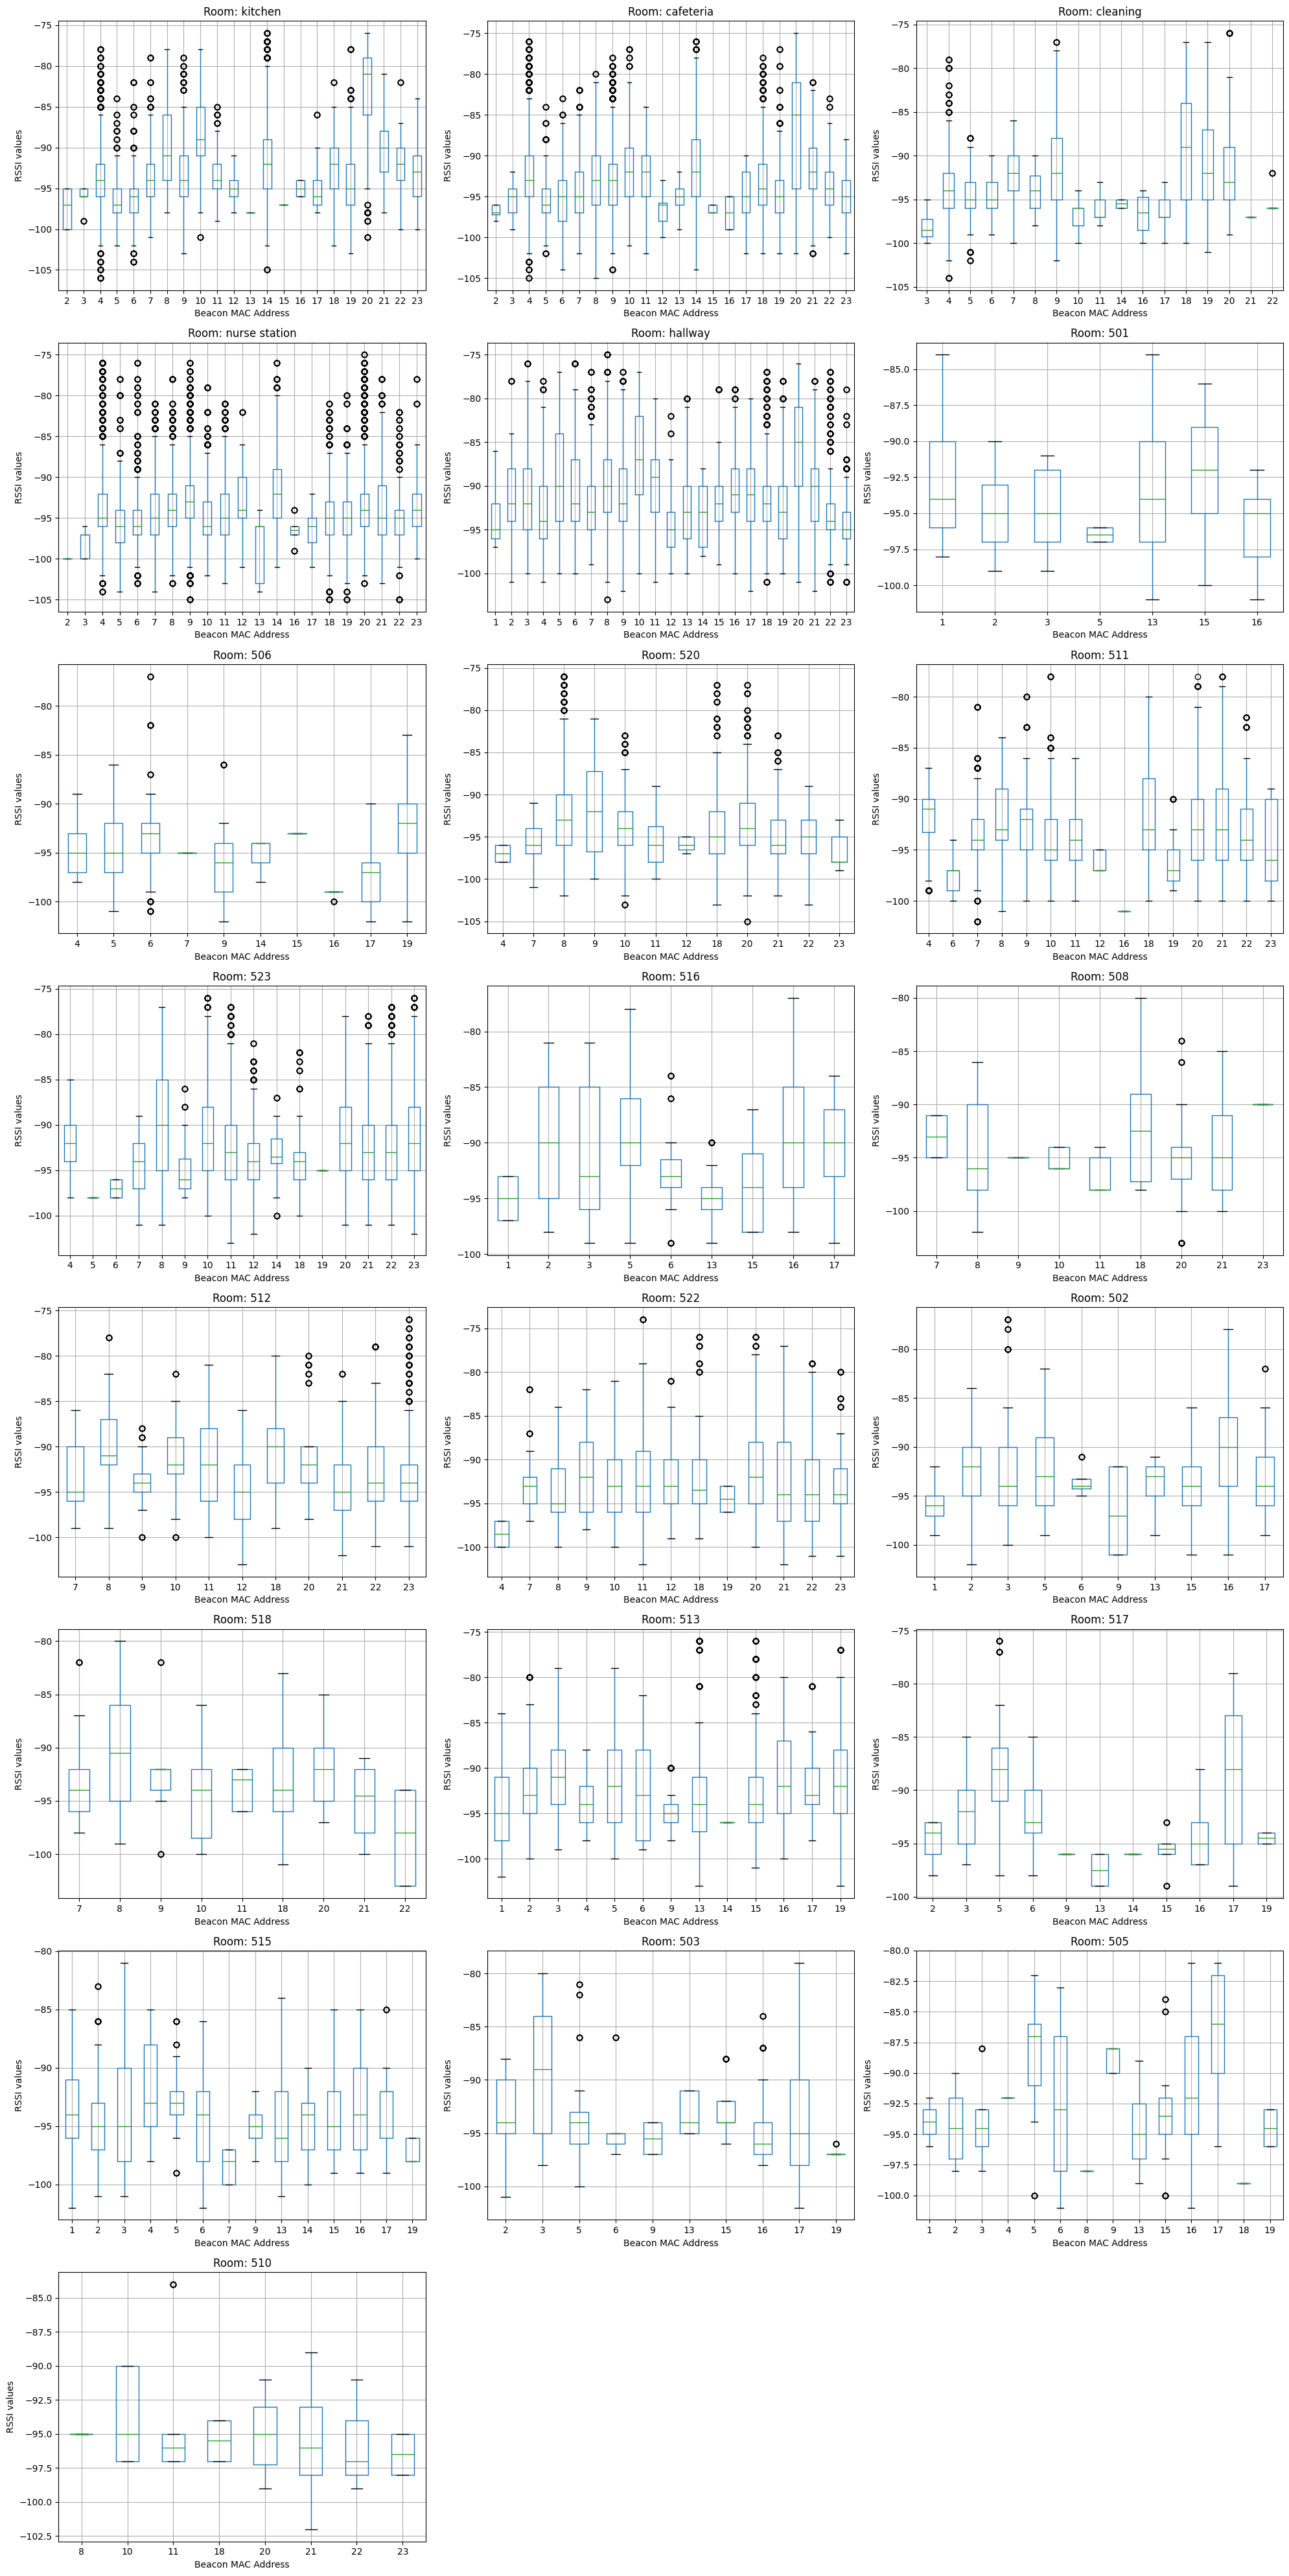

In [8]:
# now we would create a box plot of range of RSSI per beacon mac address for each of grouped by room 

# Get unique rooms
rooms = df["room"].unique()

# Calculate number of rows and columns for subplots
n_rooms = len(rooms)
n_cols = 3  # You can adjust this
n_rows = (n_rooms + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten() if n_rooms > 1 else [axes]

# Create a boxplot for each room
for idx, room in enumerate(rooms):
    room_data = df[df["room"] == room]
    room_data.boxplot(by="mac address", column='RSSI', ax=axes[idx])
    axes[idx].set_title(f'Room: {room}')
    axes[idx].set_xlabel('Beacon MAC Address')
    axes[idx].set_ylabel('RSSI values')
    axes[idx].get_figure().suptitle('')  # Remove the automatic title

# Hide extra subplots if any
for idx in range(n_rooms, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

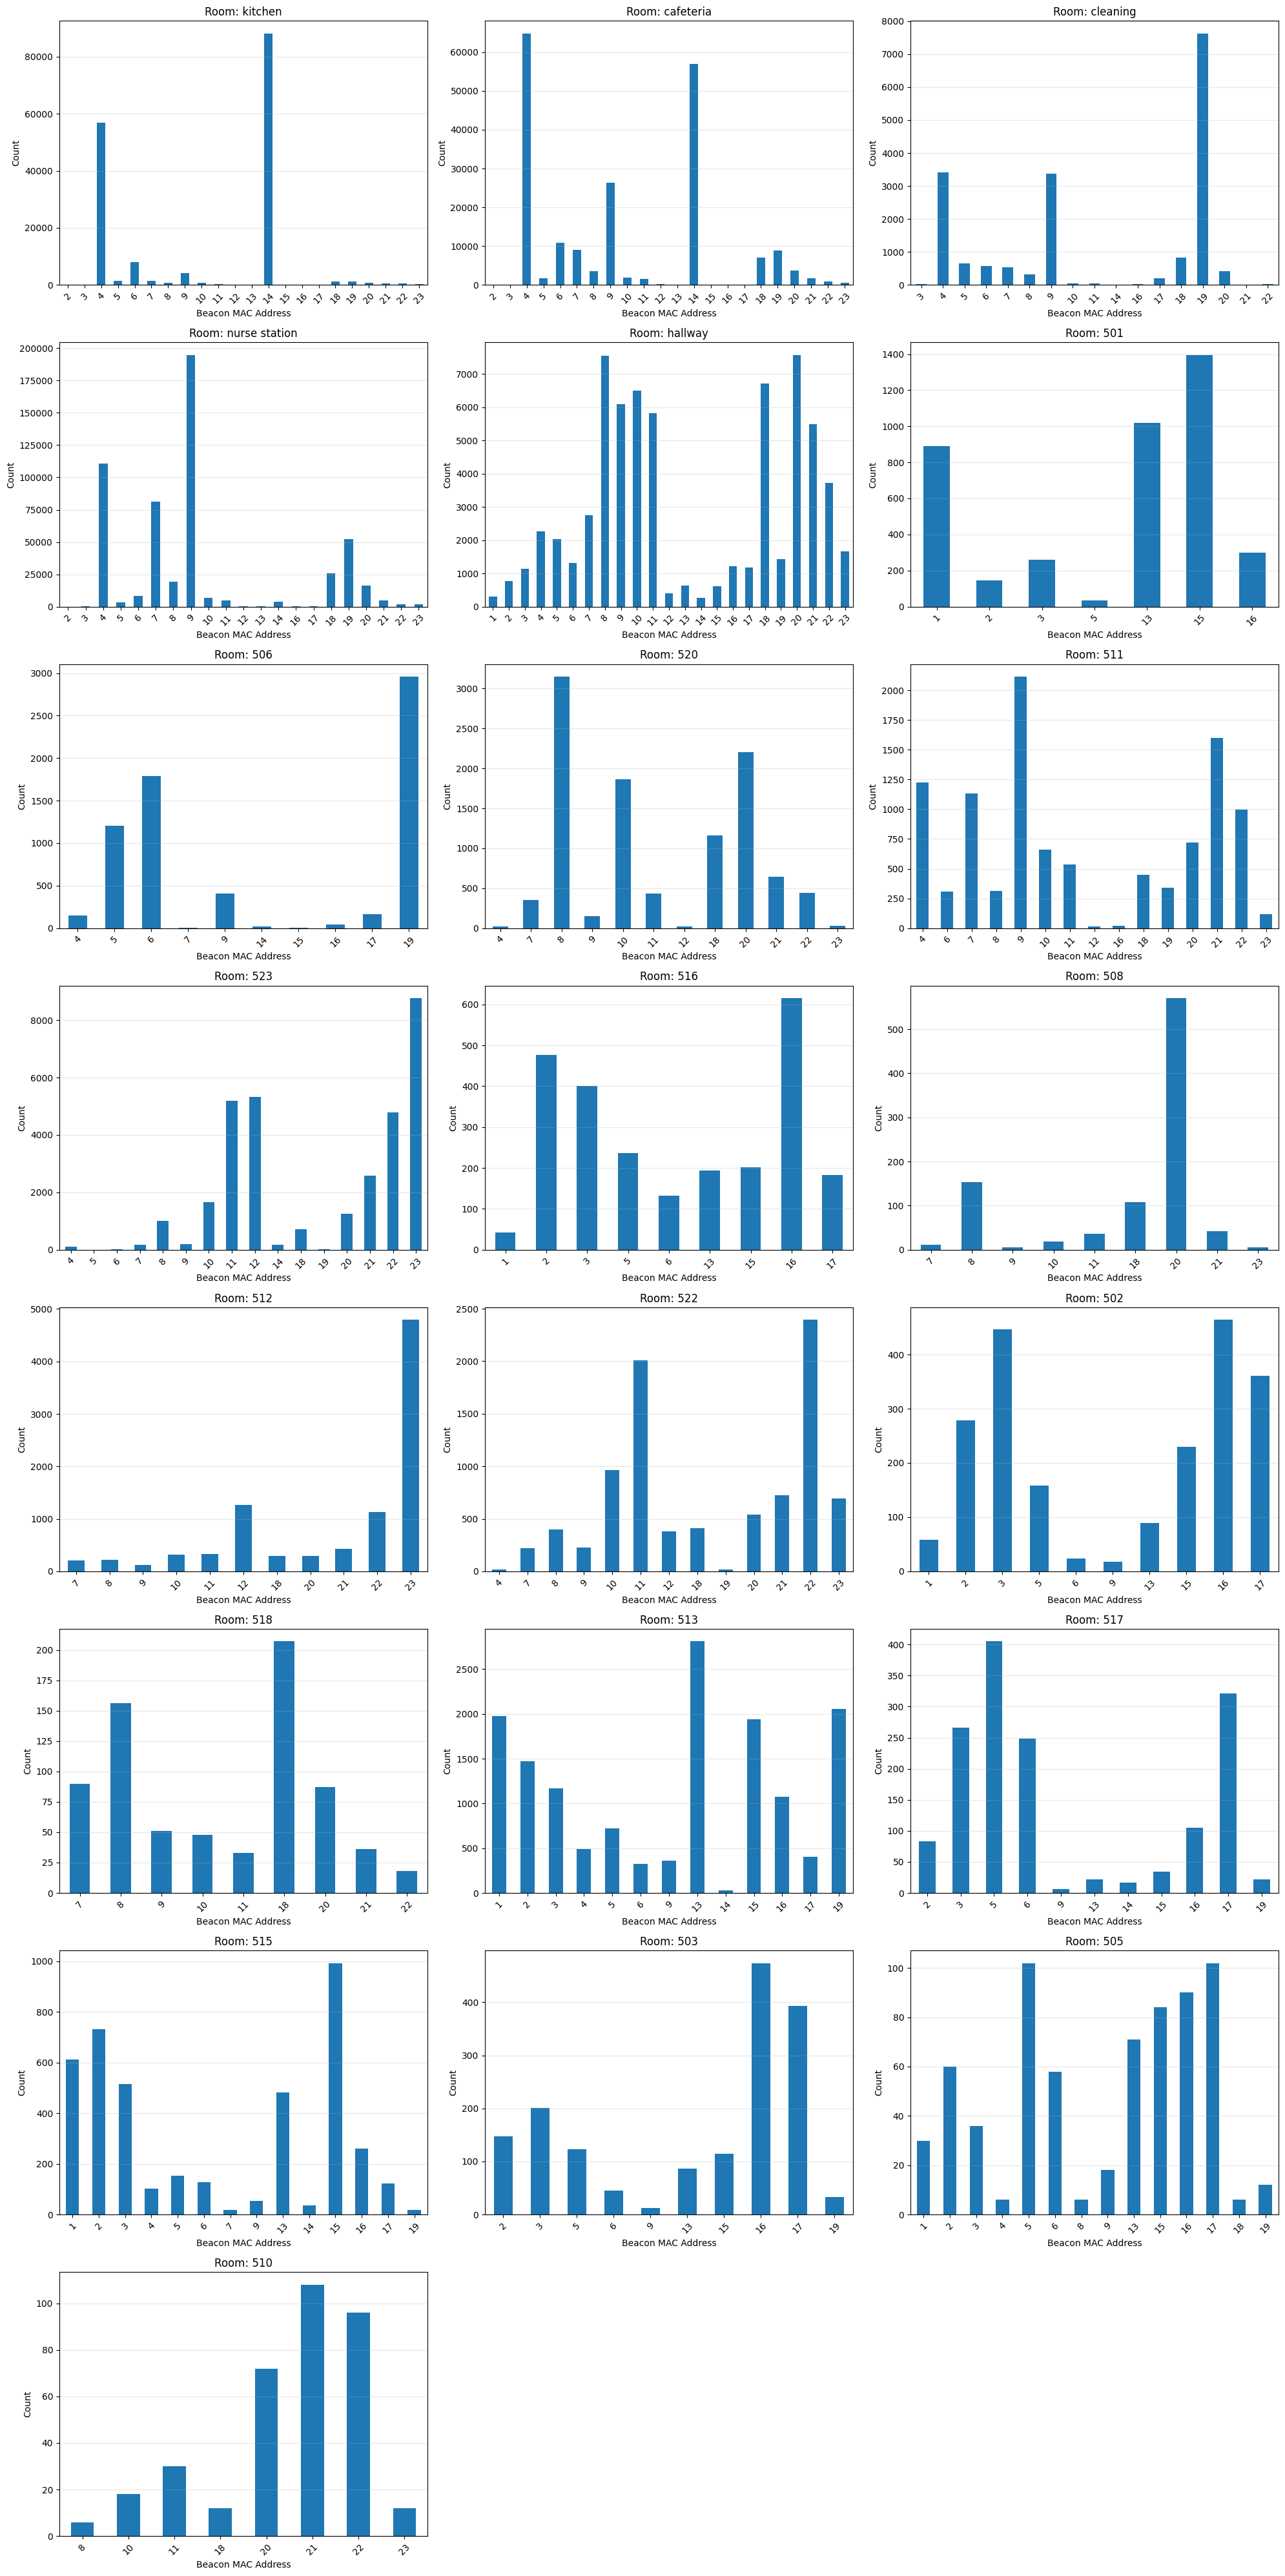

In [9]:
# Get unique rooms
rooms = df["room"].unique()

# Calculate number of rows and columns for subplots
n_rooms = len(rooms)
n_cols = 3  # You can adjust this
n_rows = (n_rooms + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten() if n_rooms > 1 else [axes]

# Create a bar chart for each room
for idx, room in enumerate(rooms):
    room_data = df[df["room"] == room]
    
    # Count occurrences of each MAC address
    mac_counts = room_data["mac address"].value_counts().sort_index()
    
    # Create bar chart
    mac_counts.plot(kind='bar', ax=axes[idx])
    axes[idx].set_title(f'Room: {room}')
    axes[idx].set_xlabel('Beacon MAC Address')
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(axis='y', alpha=0.3)

# Hide extra subplots if any
for idx in range(n_rooms, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()